# Problem Statement
#### About the Dataset
1. Age: Describes the age of individuals. Continuous.
2. Workclass:
   - Private,
   - Self-emp-not-inc,
   - Self-emp-inc,
   - Federal-gov,
   - Local-gov,
   - State-gov,
   - Without-pay,
   - Never-worked.
3. fnlwgt: Continuous.
4. education:
   - Bachelors,
   - Some-college,
   - 11th, HS-grad,
   - Prof-school,
   - Assoc-acdm,
   - Assoc-voc,
   - 9th,
   - 7th-8th,
   - 12th,
   - Masters,
   - 1st-4th,
   - 10th,
   - Doctorate,
   - 5th-6th,
   - Preschool.
5. education-num: Number of years spent in education. Continuous.
6. marital-status:
   - Married-civ-spouse,
   - Divorced,
   - Never-married,
   - Separated,
   - Widowed,
   - Married-spouse-absent,
   - Married-AF-spouse.
7. occupation:
   - Tech-support,
   - Craft-repair,
   - Other-service,
   - Sales,
   - Exec-managerial,
   - Prof-specialty,
   - Handlers-cleaners,
   - Machine-op-inspct,
   - Adm-clerical,
   - Farming-fishing,
   - Transport-moving,
   - Priv-house-serv,
   - Protective-serv,
   - Armed-Forces.
8. relationship:
   - Wife,
   - Own-child,
   - Husband,
   - Not-in-family,
   - Other-relative,
   - Unmarried.
9. race:
    - White,
    - Asian-Pac-Islander,
    - Amer-Indian-Eskimo,
    - Other,
    - Black.
10. sex: Female, Male.
11. capital-gain: Continuous.
12. capital-loss: Continuous.
13. hours-per-week: Continuous.
14. native-country:
     - United-States,
     - Cambodia,
     - England,
     - Puerto-Rico,
     - Canada,
     - Germany,
     - Outlying-US(Guam-USVI-etc),
     - India,
     - Japan,
     - Greece,
     - South,
     - China,
     - Cuba,
     - Iran,
     - Honduras,
     - Philippines,
     - Italy,
     - Poland,
     - Jamaica,
     - Vietnam,
     - Mexico,
     - Portugal,
     - Ireland,
     - France,
     - Dominican-Republic,
     - Laos,
     - Ecuador,
     - Taiwan,
     - Haiti,
     - Columbia,
     - Hungary,
     - Guatemala,
     - Nicaragua,
     - Scotland,
     - Thailand,
     - Yugoslavia,
     - El-Salvador,
     - Trinadad&Tobago,
     - Peru, Hong,
     - Holand-Netherlands.
15. salary: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Rename the following columns:
# education.num -> education_num
# marital.status -> marital_status
# capital.gain -> capital_gain
# capital.loss -> capital_loss
# hours.per.week -> hours_per_week
df.rename(columns = {'education.num':'education_num','marital.status':'marital_status','capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'},inplace=True)

In [5]:
df.shape

(32561, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Check null values in our complete dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# check duplicet value in data set
# and drop them if any exists
df.duplicated().sum()

24

In [11]:
# drop duplicate value from data
df.drop_duplicates(inplace=True)

In [12]:
# saprate catigorical and numerical features
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns

In [13]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [14]:
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [15]:
# to count value and feature of the categorical columns
# df['workclass'].value_counts() -> this code will only give output for one columns as mentioned its "workclass"
# so we need to use for loop for considering all data.

for i in categorical_features:
    print(i,df[i].unique())
    print()
    print("************************************************ Seperated Columns **************************************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

************************************************ Seperated Columns **************************************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

************************************************ Seperated Columns **************************************************

marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

************************************************ Seperated Columns **************************************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'


In [16]:
for i in numerical_features:
    print(i,df[i].unique())
    print()
    print("************************************************ Seperated Columns **************************************************")
    print()

age [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]

************************************************ Seperated Columns **************************************************

fnlwgt [ 77053 132870 186061 ...  34066  84661 257302]

************************************************ Seperated Columns **************************************************

education_num [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]

************************************************ Seperated Columns **************************************************

capital_gain [    0 99999 41310 34095 27828 25236 25124 22040 20051 18481 15831 15024
 15020 14344 14084 13550 11678 10605 10566 10520  9562  9386  8614  7978
  7896  7688  7443  7430  7298  6849  6767  6723  6514  6497  6418  6360
  6097  5721  5556  5455  5178  5060  5013  4934  4931  4865 

In [17]:
df.value_counts('capital_loss')

capital_loss
0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2282        1
1844        1
155         1
2080        1
1944        1
Name: count, Length: 92, dtype: int64

In [18]:
# to calculate the mode of all columns in categocategorical_features
mode = pd.DataFrame(df)
print(mode.mode())

    age workclass  fnlwgt education  education_num      marital_status  \
0  36.0   Private  123011   HS-grad            9.0  Married-civ-spouse   
1   NaN       NaN  164190       NaN            NaN                 NaN   
2   NaN       NaN  203488       NaN            NaN                 NaN   

       occupation relationship   race   sex  capital_gain  capital_loss  \
0  Prof-specialty      Husband  White  Male           0.0           0.0   
1             NaN          NaN    NaN   NaN           NaN           NaN   
2             NaN          NaN    NaN   NaN           NaN           NaN   

   hours_per_week native_country income  
0            40.0  United-States  <=50K  
1             NaN            NaN    NaN  
2             NaN            NaN    NaN  


In [19]:
# In above cell we calculated the mode of catecategorical_features for all columns
# as we have the unwanted "?" in workclass, occupation, and native country
# so lets replace it with the mode we found in those columns

df["workclass"] = df["workclass"].replace("?","Private")
df["occupation"] = df["occupation"].replace("?","Prof-specialty")
df["native_country"] = df["native_country"].replace("?","United-States")

In [20]:
for i in categorical_features:
    print(i,df[i].unique())
    print()
    print("************************************************ Seperated Columns **************************************************")
    print()

workclass ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

************************************************ Seperated Columns **************************************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

************************************************ Seperated Columns **************************************************

marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

************************************************ Seperated Columns **************************************************

occupation ['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protect

---

---

# Data Visualization in presence of Outliers.

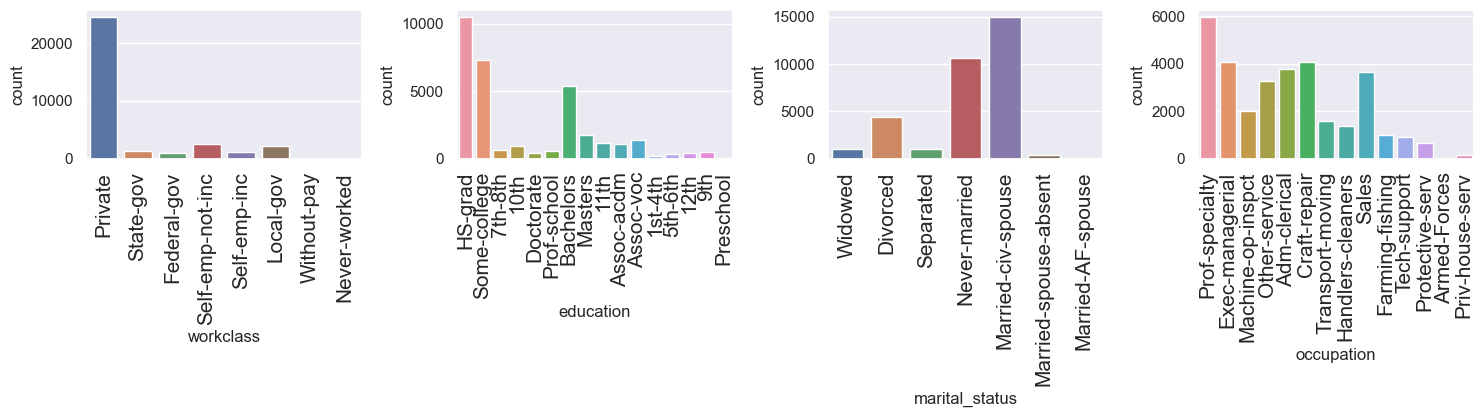

In [21]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

column1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(column1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[column1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

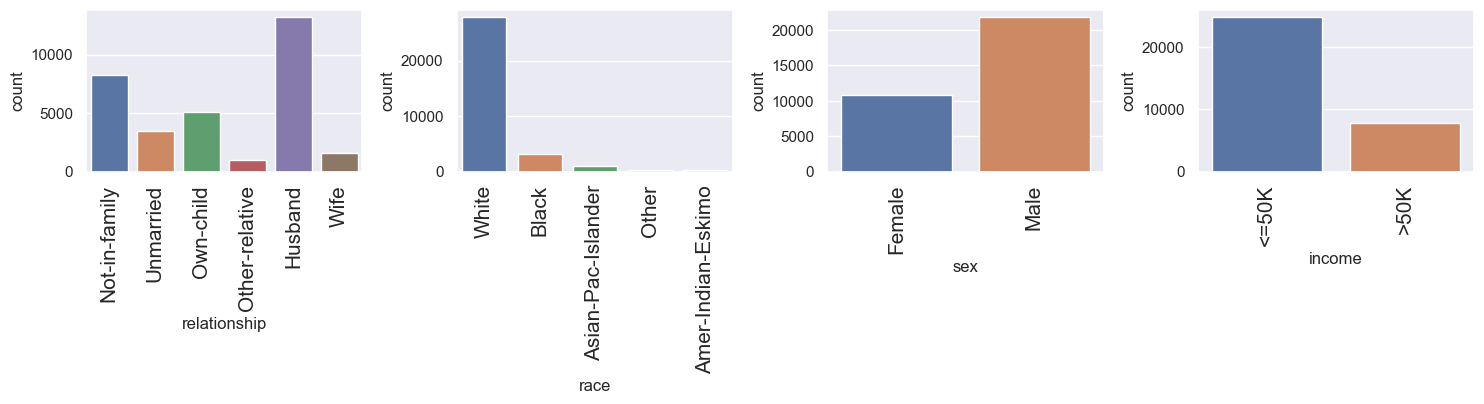

In [22]:
column2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(column2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[column2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

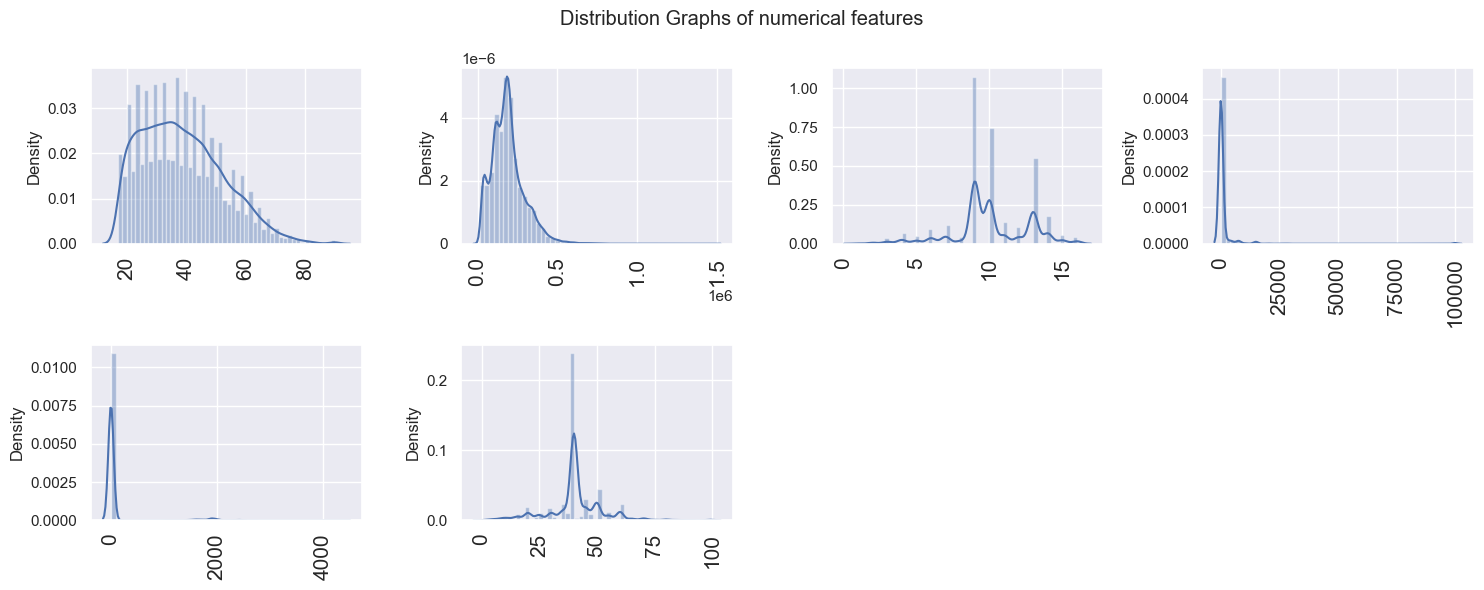

In [23]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

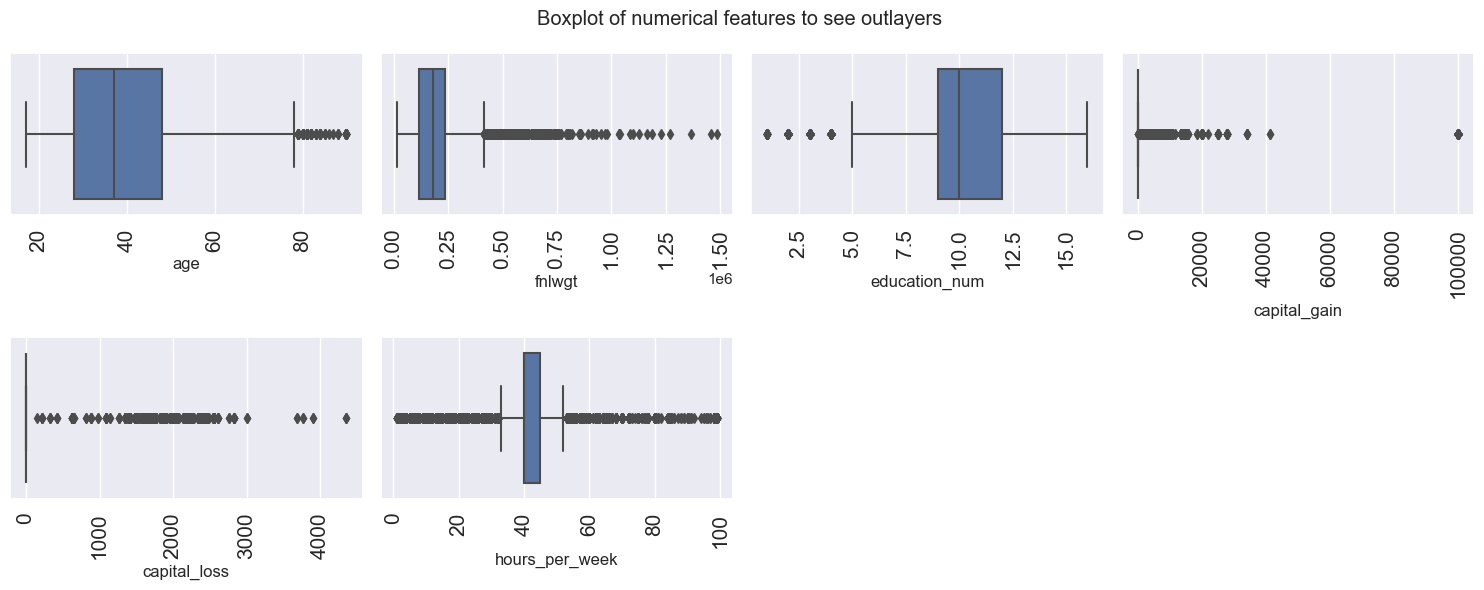

In [24]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

## Outlier Detection and dealing with them

<Axes: >

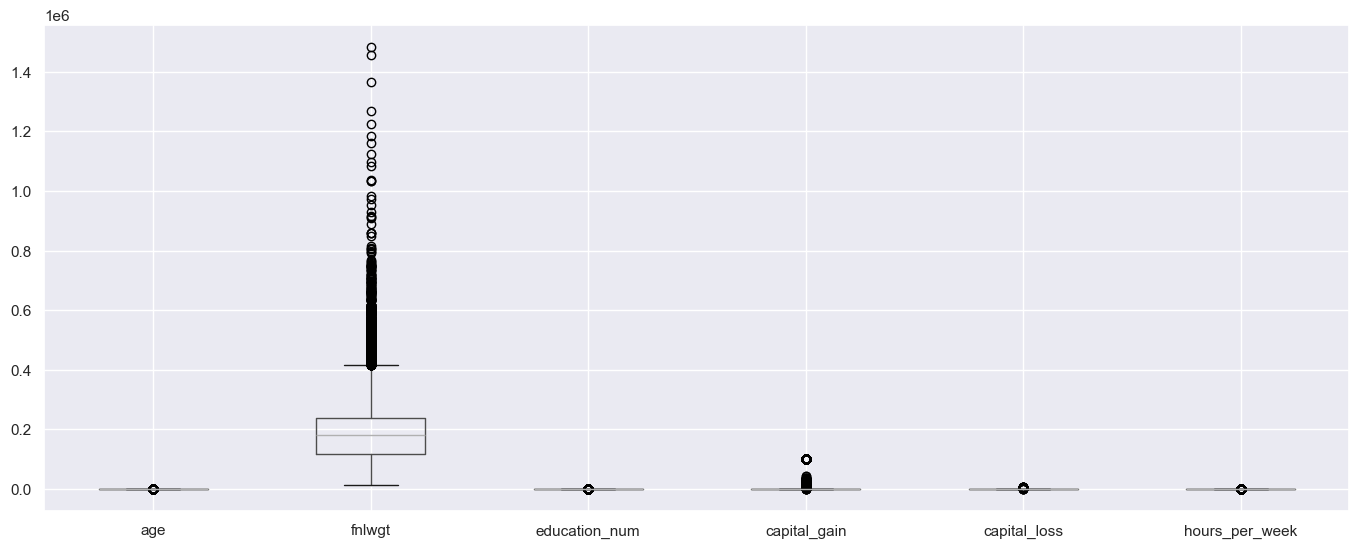

In [25]:
# Outliers Detection and dealing with the outliers
df.boxplot()

- as we can see the outliers lies in columns like, "fnlwgt" and "capital_gain"
- both columns has outliers at upper extreme

<Axes: xlabel='fnlwgt'>

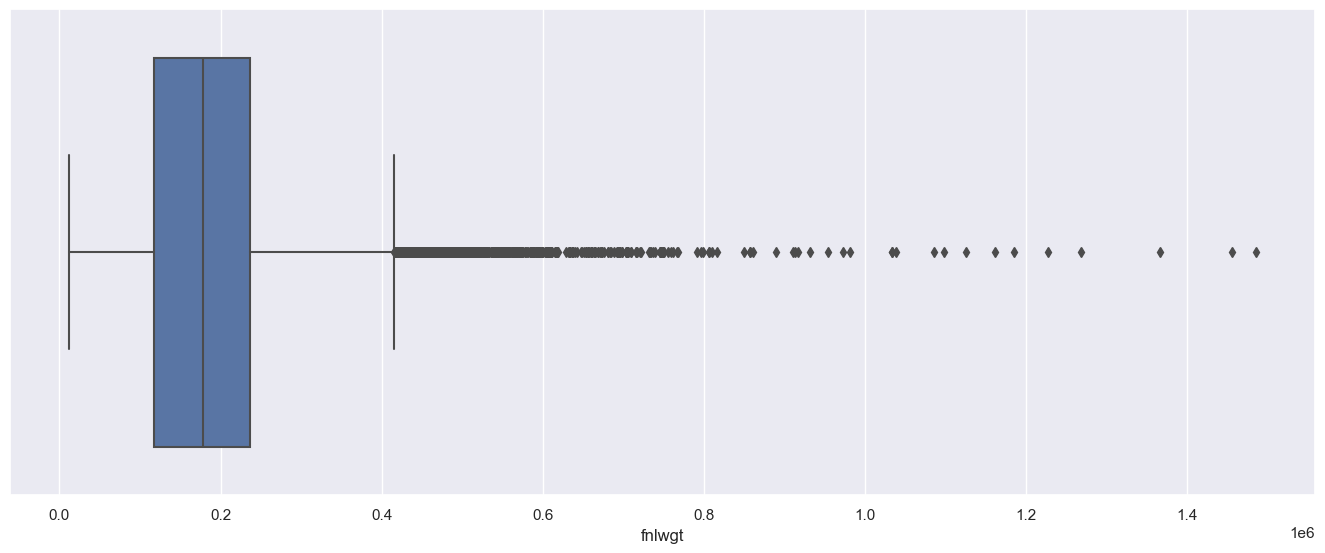

In [26]:
# boxplot of fnlwgt in seaborn library to get detailed view
sns.boxplot(x = df['fnlwgt'])

<Axes: xlabel='capital_gain'>

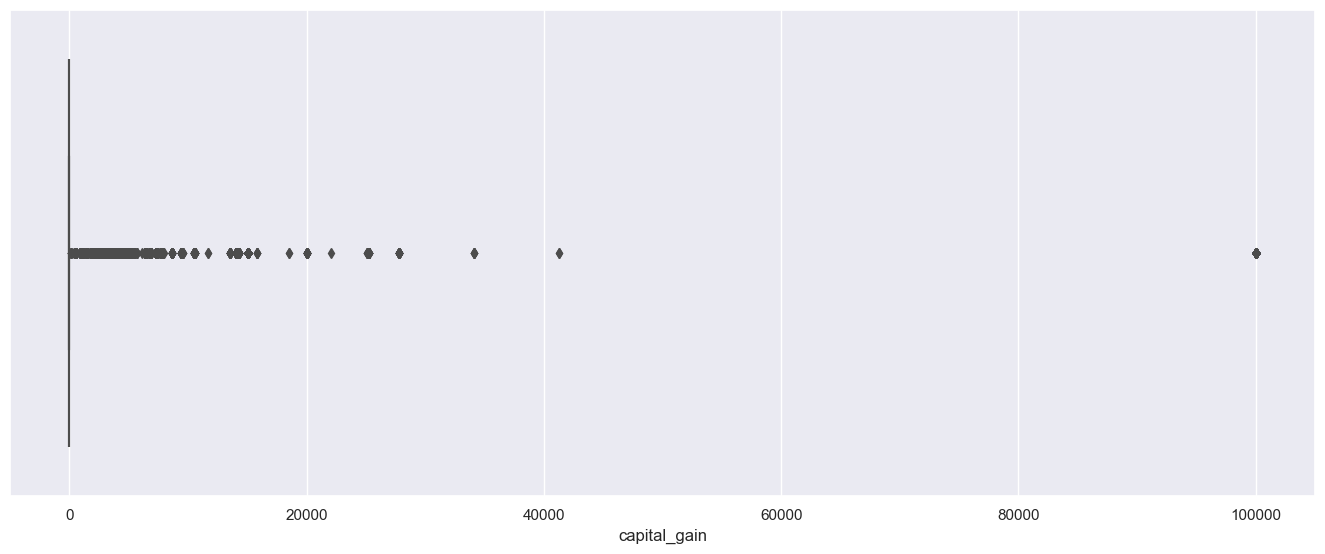

In [27]:
# boxplot of capital_gain in seaborn library to get detailed view
sns.boxplot(x = df['capital_gain'])

In [28]:
# To find the 25th percentile value we use 'quantile' function and we need to give the required percentile in range of 0-1
# i.e for 25th percentile --> 0.25
df['fnlwgt'].quantile(0.25)

117827.0

In [29]:
#creating the function for outlier detection, 'iqr = Interquartile range' 
# the last line is capping method

def outlier_detection(data,columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [30]:
# we need to drop column 'Weather' from funtion as it has Text data and will give error for funtion.
# the drop function in following code will drop the weather column temprary for use of funtion and not from data.
outlier_detection(df,df.drop(columns = {'workclass','education','marital_status','occupation','relationship','race','sex','native_country','income'}).columns)

<Axes: >

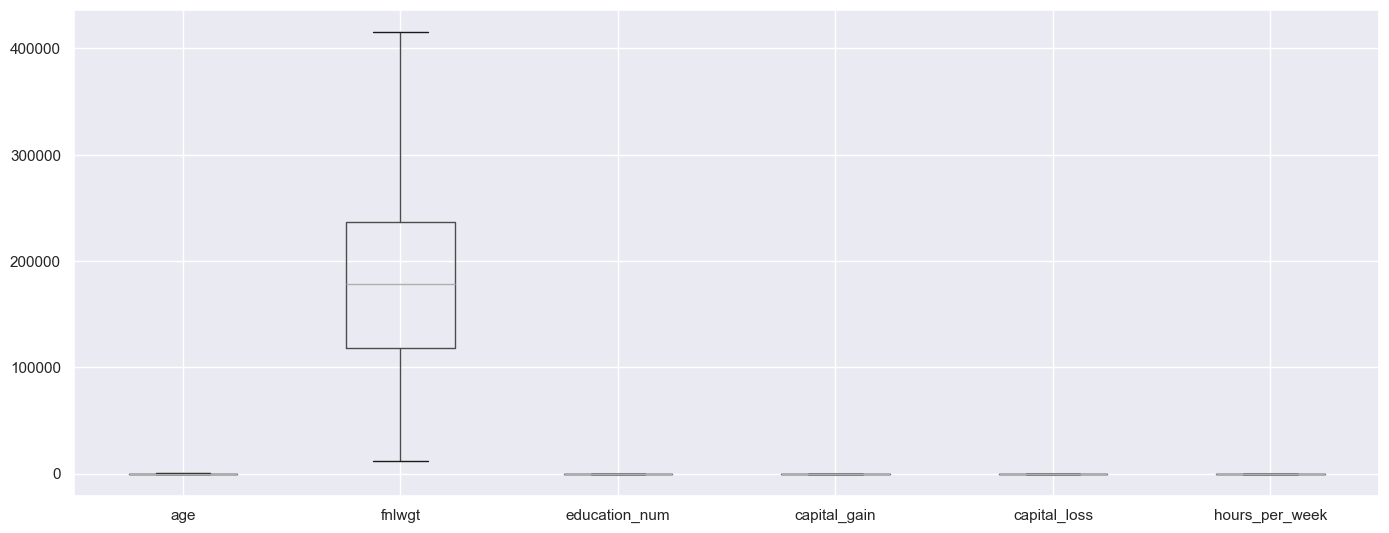

In [31]:
df.boxplot()

---

---

# Data Visualization

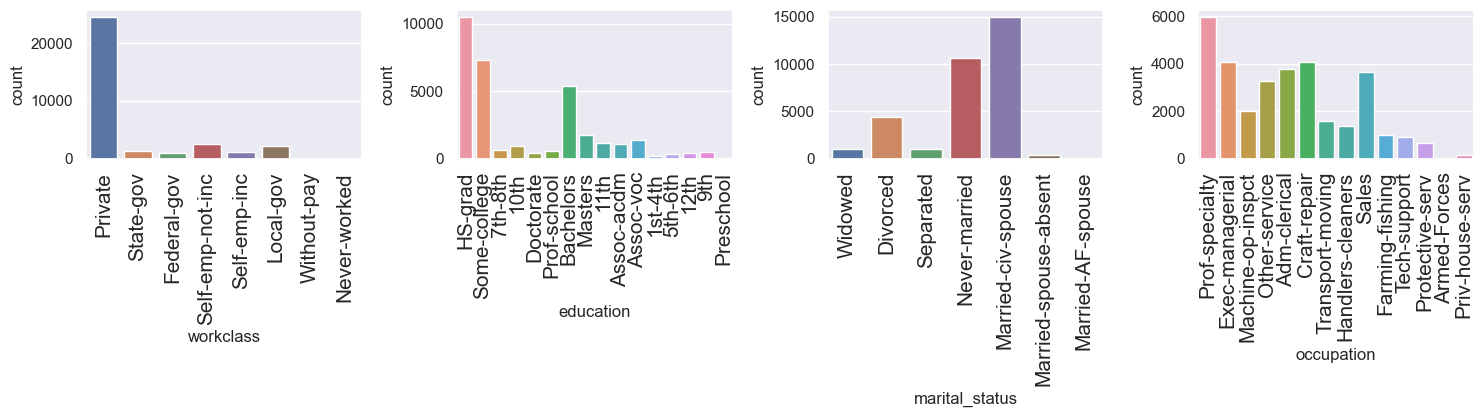

In [32]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

column1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(column1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[column1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

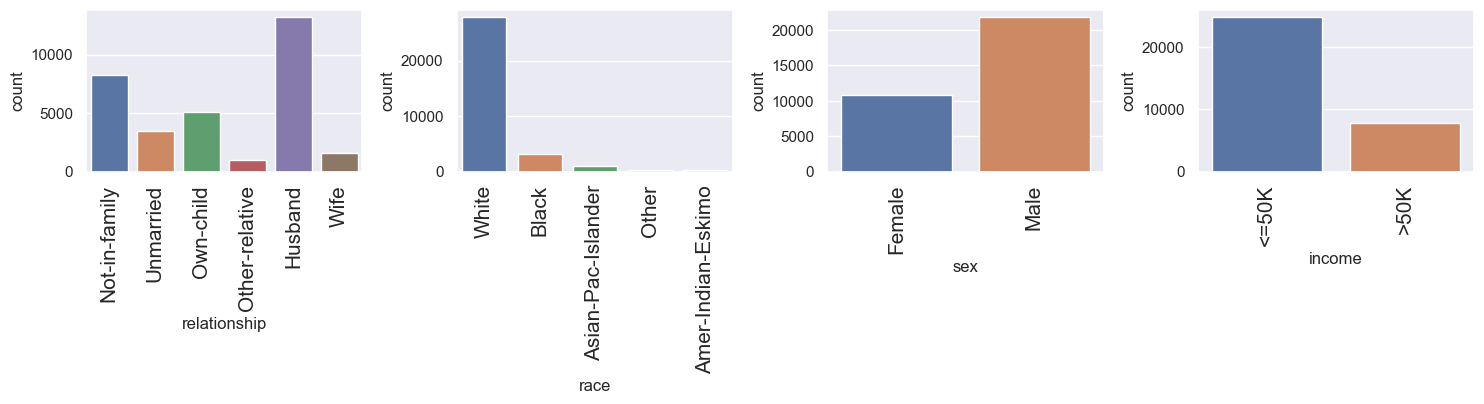

In [33]:
column2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(column2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[column2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()


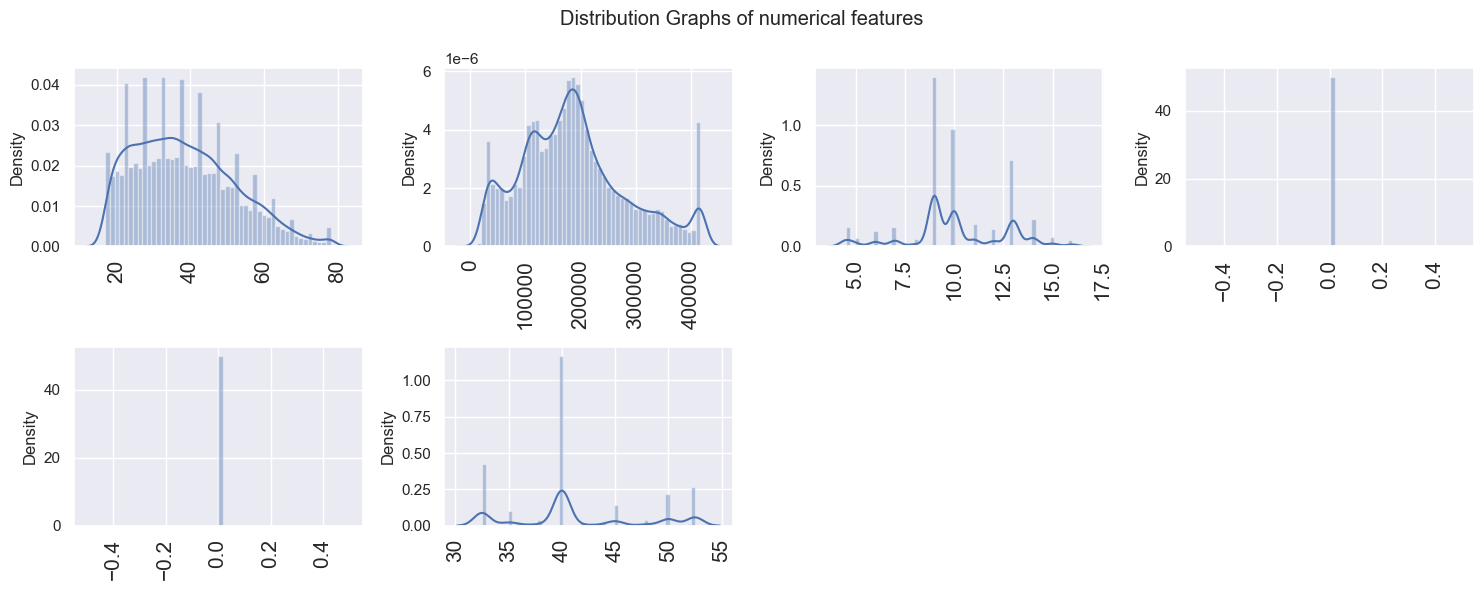

In [34]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

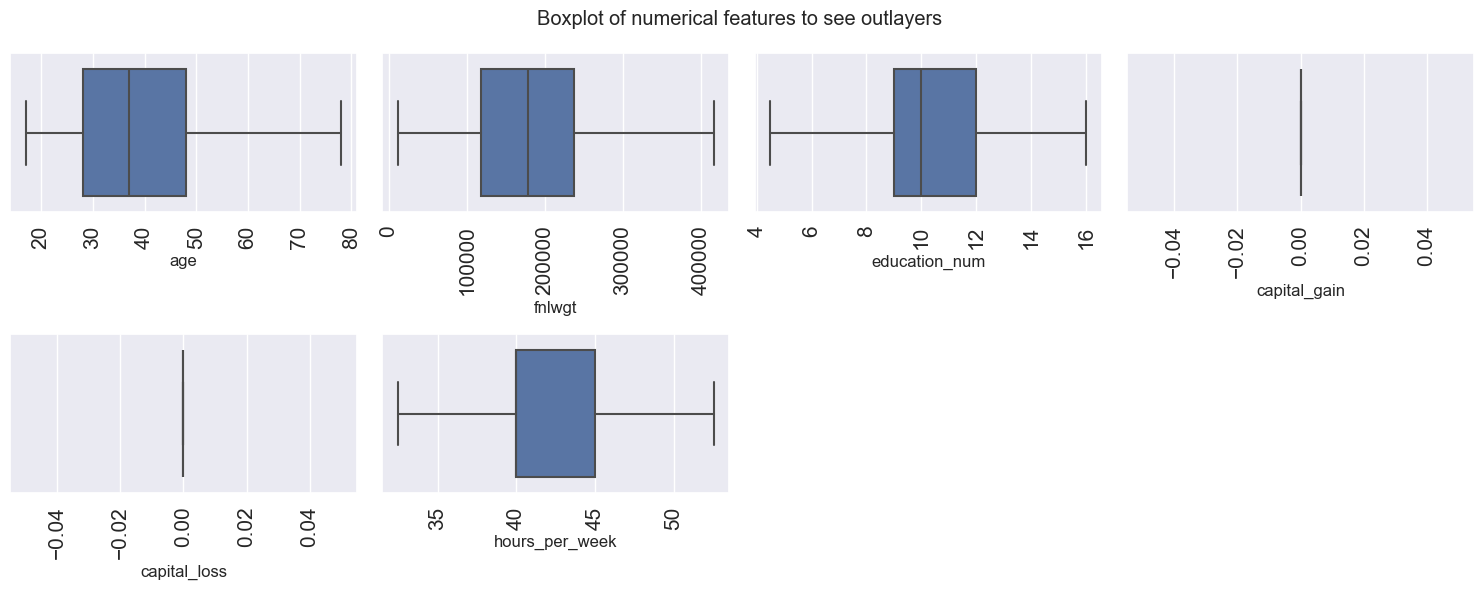

In [35]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [36]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,0.0,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K


<Axes: xlabel='income'>

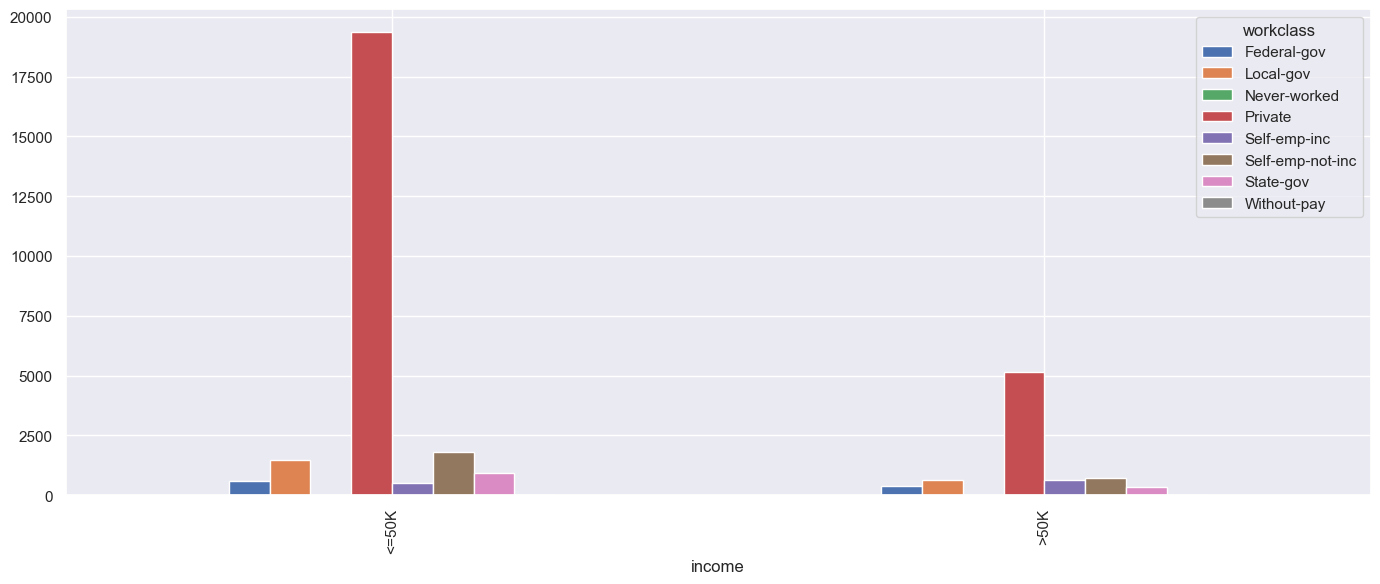

In [37]:
salary = pd.crosstab(df['income'],df['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

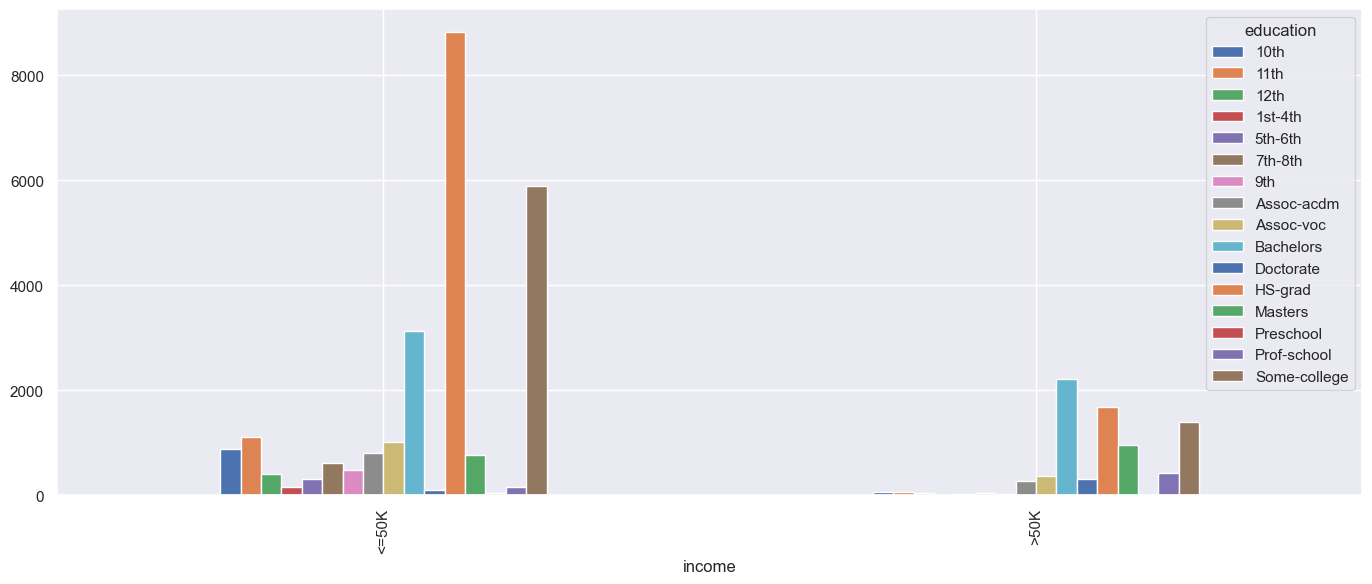

In [38]:
education = pd.crosstab(df['income'],df['education'])
education.plot(kind="bar")

<Axes: xlabel='income'>

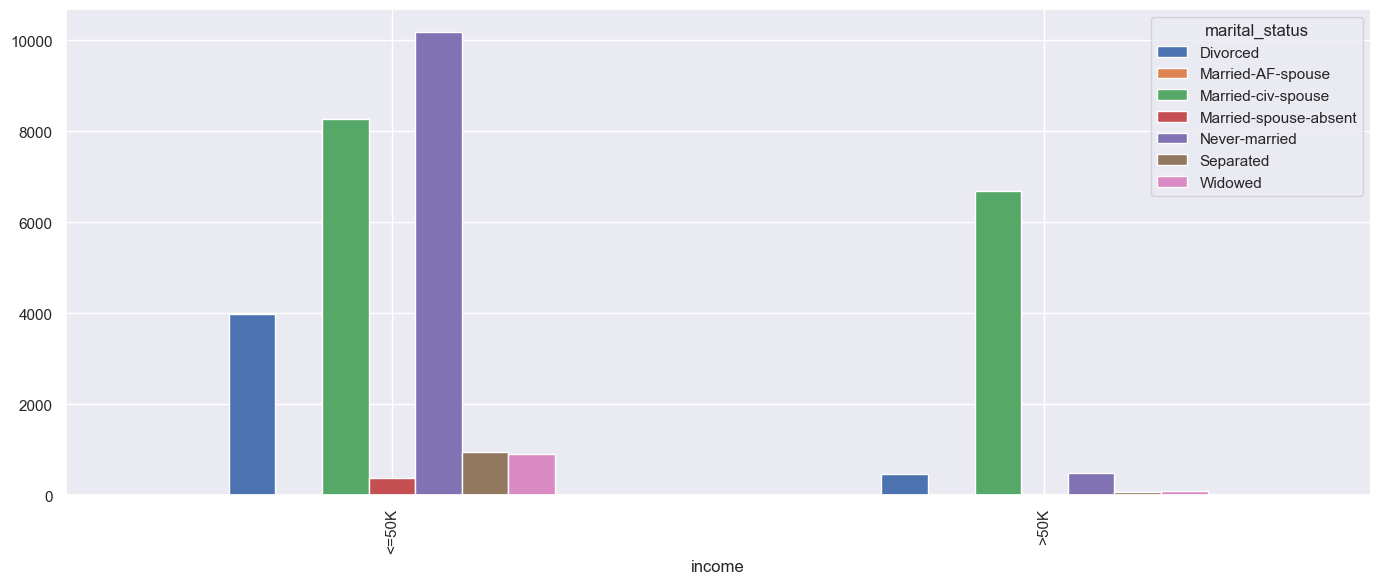

In [39]:
marital_status = pd.crosstab(df['income'],df['marital_status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

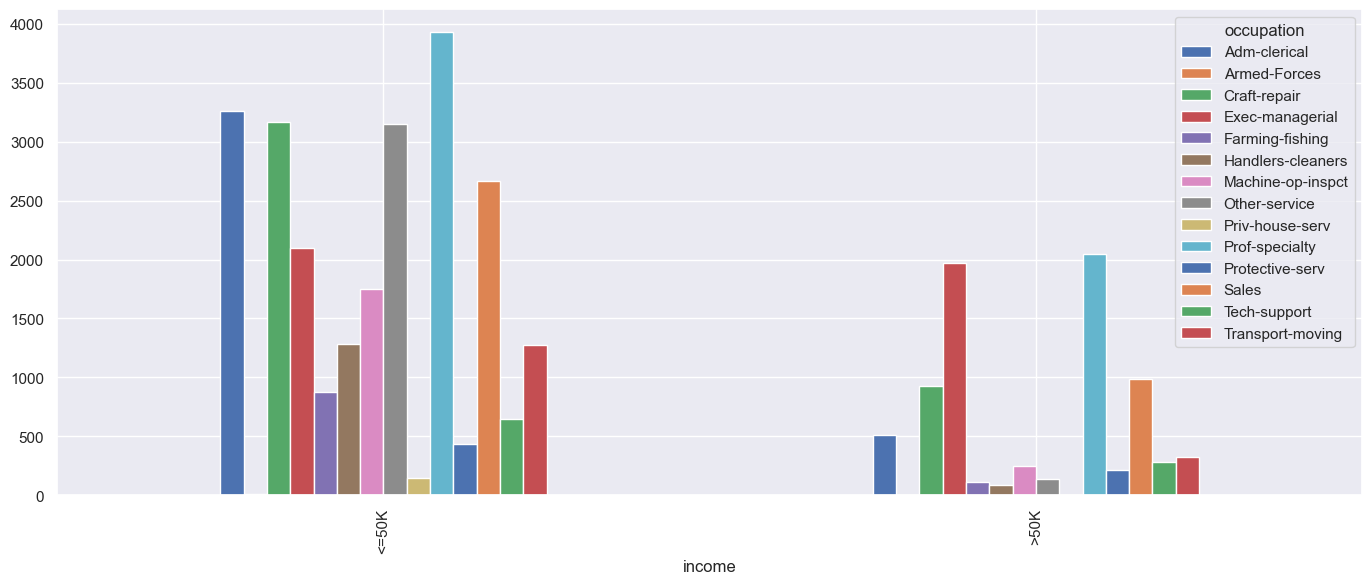

In [40]:
occupation = pd.crosstab(df['income'],df['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

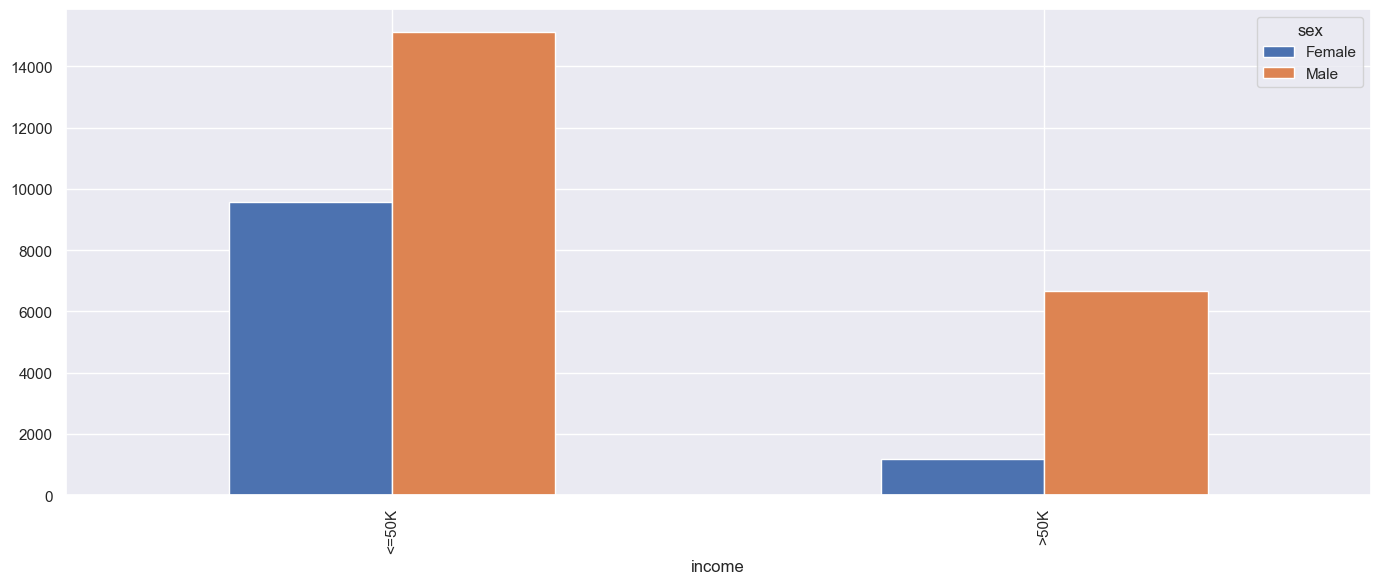

In [41]:
sex = pd.crosstab(df['income'],df['sex'])
sex.plot(kind="bar")

In [42]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [43]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,0.0,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K


In [44]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

In [45]:
df["income"] = df["income"].map({'<=50K':0, '>50K':1})

<Axes: >

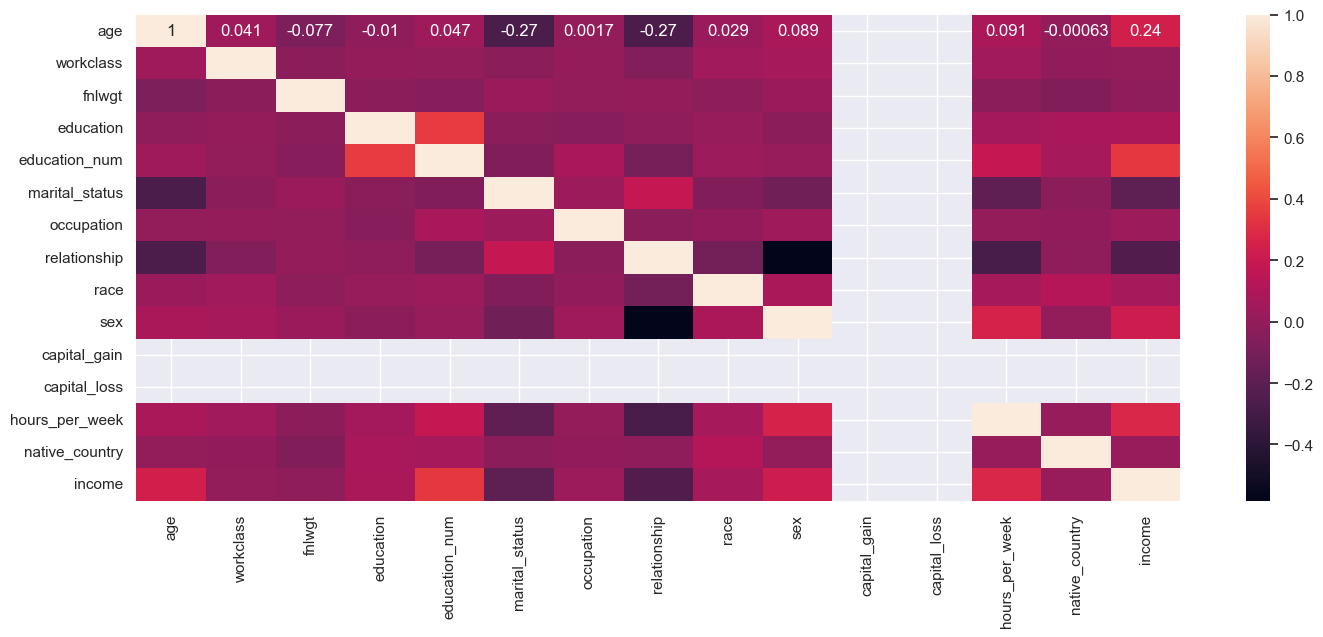

In [46]:
sns.heatmap(df.corr(),annot=True)

In [47]:
df['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [48]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,78.0,3,77053.0,11,9.0,6,9,1,4,0,0.0,0.0,40.0,38,0
1,78.0,3,132870.0,11,9.0,6,3,1,4,0,0.0,0.0,32.5,38,0
2,66.0,3,186061.0,15,10.0,6,9,4,2,0,0.0,0.0,40.0,38,0
3,54.0,3,140359.0,5,4.5,0,6,4,4,0,0.0,0.0,40.0,38,0
4,41.0,3,264663.0,15,10.0,5,9,3,4,0,0.0,0.0,40.0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,3,310152.0,15,10.0,4,10,1,4,1,0.0,0.0,40.0,38,0
32557,27.0,3,257302.0,7,12.0,2,12,5,4,0,0.0,0.0,38.0,38,0
32558,40.0,3,154374.0,11,9.0,2,6,0,4,1,0.0,0.0,40.0,38,1
32559,58.0,3,151910.0,11,9.0,6,0,4,4,0,0.0,0.0,40.0,38,0


----

---

# Model Training and machine learning algorithms

In [49]:
df.shape

(32537, 15)

In [50]:
# Saprate dependent and indipendent features
x = df.drop("income",axis=1)
y = df["income"]

In [51]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [53]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [54]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 14)
(6508, 14)
(26029,)
(6508,)


## Machine Learning Algorithms

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [57]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore

 ## Use Hyper parameter tunning

In [58]:
lr = LogisticRegression()

In [59]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [60]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [63]:
grid.score(X_train,y_train)

0.7395981405355565

In [64]:
y_prad = grid.predict(X_test)

In [65]:
accuracy_score(y_test,y_prad)

0.7409342347879533

In [66]:
dr = DecisionTreeClassifier()

In [67]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [68]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [69]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [70]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [71]:
grid_search.score(X_train,y_train)

0.7264589496331015

In [72]:
y_prad = grid_search.predict(X_test)

In [73]:
accuracy_score(y_test,y_prad)

0.7131223110018439

In [74]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      4988
           1       0.44      0.88      0.59      1520

    accuracy                           0.71      6508
   macro avg       0.70      0.77      0.68      6508
weighted avg       0.83      0.71      0.74      6508



In [75]:
rf = RandomForestClassifier()

In [76]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [77]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [78]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [79]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 20}

In [80]:
grid_search.score(X_train,y_train)

0.8100195935302932

In [81]:
y_prad = grid_search.predict(X_test)

In [82]:
accuracy_score(y_test,y_prad)

0.784880147510756

In [83]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4988
           1       0.52      0.84      0.65      1520

    accuracy                           0.78      6508
   macro avg       0.73      0.80      0.75      6508
weighted avg       0.84      0.78      0.80      6508



In [84]:
params = {
                "Random Forest":{
                    "class_weight":["balanced"],
                    'n_estimators': [20, 50, 30],
                    'max_depth': [10, 8, 5],
                    'min_samples_split': [2, 5, 10],
                },
                "Decision Tree":{
                    "class_weight":["balanced"],
                    "criterion":['gini',"entropy","log_loss"],
                    "splitter":['best','random'],
                    "max_depth":[3,4,5,6],
                    "min_samples_split":[2,3,4,5],
                    "min_samples_leaf":[1,2,3],
                    "max_features":["auto","sqrt","log2"]
                },
                "Logastic":{
                    "class_weight":["balanced"],
                    'penalty': ['l1', 'l2'],
                    'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['liblinear', 'saga']
                }
            }